In [76]:
from __future__ import division, print_function
import datasets
import pandas as pd
import numpy as np
import model01
import keras
import utils
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [6]:
model_file = 'MLPModel01_20170423_2154_EURUSD_DS3_20092014_LA1_F99_C2_L500_500_DO0.5-1000-0.6914.hdf5'
model = keras.models.load_model('output/' + model_file)

In [ ]:
Y_test_pred = model.predict(X_test.as_matrix(), batch_size=1024)

In [8]:
for sym, years in utils.fx_1minute_bar_catalog().items():
    print(sym, years)
    

('XAUUSD', ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'])
('EURUSD', ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'])
('EURSEK', ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'])
('USDJPY', ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'])


In [66]:
lookahead=1
n_periods = 25

In [67]:
prices = utils.load_1minute_fx_bars('EURSEK', 2009)

In [68]:
full_X,full_Y,_ = datasets.prepare_dataset3(
    prices, lookahead=lookahead, n_periods=n_periods)

In [73]:
full_X.head()[['open-0', 'open-404']]

,open-0,open-404
ts,,
2009-01-13 16:13:00,0.019016,0.573605
2009-01-13 16:14:00,0.019014,0.026300
2009-01-13 16:18:00,0.019788,0.025749
2009-01-13 16:19:00,1.515225,0.025746
2009-01-13 16:20:00,-0.098678,-0.834357


In [84]:
N = 5575
X = []

while len(X) == 0:
    X,Y,_ = datasets.prepare_dataset3(
        prices.head(N), lookahead=lookahead, n_periods=n_periods)
    N += 1
print (len(X), N)
      

2 5604


In [85]:
N

5604

In [86]:
X

,open-0,high-0,low-0,open-1,high-1,low-1,close-1,open-2,high-2,low-2,...,low-328,close-328,open-365,high-365,low-365,close-365,open-404,high-404,low-404,close-404
ts,,,,,,,,,,,,,,,,,,,,,
2009-01-13 16:13:00,0.019016,-0.406351,0.375974,0.019018,-0.406408,0.376026,0.016192,0.019020,-0.406465,0.376079,...,0.374735,-0.736366,0.218792,-0.080155,0.372161,-0.839587,0.573605,1.719897,0.371731,-0.296329
2009-01-13 16:14:00,0.019014,-0.406294,0.375922,0.019016,-0.406351,0.375974,0.798596,0.019018,-0.406408,0.376026,...,0.328711,-0.908187,-0.369935,-0.407771,-0.504444,-0.769797,0.026300,-0.403850,0.371679,-0.254102


In [161]:
X.shape

(2, 99)

In [182]:
X.ix[-1:,:].as_matrix()

array([[ 0.01901364, -0.4062942 ,  0.37592189,  0.01901574, -0.40635108,
         0.37597416,  0.79859626,  0.01901784, -0.40640799,  0.37602645,
         0.59249525,  0.01901994, -0.40646491,  0.37607876,  0.49487624,
         0.01902204, -0.40652185,  0.37613108,  0.42998164,  0.53072491,
         3.22269297,  0.14508963,  0.38936421,  0.01916954, -0.40642181,
         0.37626945,  1.10137076,  0.01903645, -0.40622429,  0.37608347,
         0.45528856,  0.01905116, -0.40662259,  0.37645015,  0.3886096 ,
         0.01879647, -0.40710181,  0.37660503, -0.09395419,  0.01845169,
        -0.40769695,  0.37673493, -0.03909773,  0.01870234, -0.40802033,
         0.37741944, -0.04151092,  0.01942671, -0.4087569 ,  0.37741981,
         0.18722723,  0.0176979 , -0.40829676,  0.37640859, -0.05332877,
        -0.56736091,  0.49963427, -0.31087992,  0.11216981, -0.05998931,
        -0.40679637,  0.28393678,  0.25027016,  0.01790935, -0.41157875,
         0.37578164, -1.64006258,  0.01810479, -0.4

In [184]:
model.predict(X.ix[-1:,:].as_matrix()).ravel()[0]

0.50318688

-----------------------------------

## Feature analysis


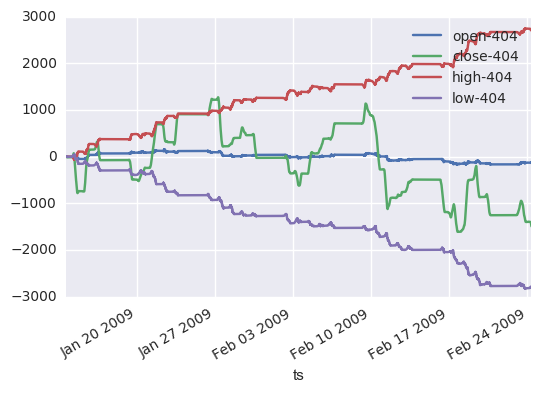

In [120]:
full_X['open-404'].head(20000).cumsum().plot(label='open-404')
full_X['close-404'].head(20000).cumsum().plot(label='close-404')
full_X['high-404'].head(20000).cumsum().plot(label='high-404')
full_X['low-404'].head(20000).cumsum().plot(label='low-404')
plt.legend()

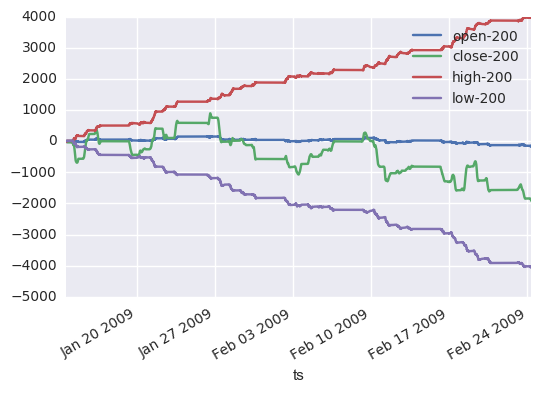

In [119]:
full_X['open-200'].head(20000).cumsum().plot(label='open-200')
full_X['close-200'].head(20000).cumsum().plot(label='close-200')
full_X['high-200'].head(20000).cumsum().plot(label='high-200')
full_X['low-200'].head(20000).cumsum().plot(label='low-200')
plt.legend()

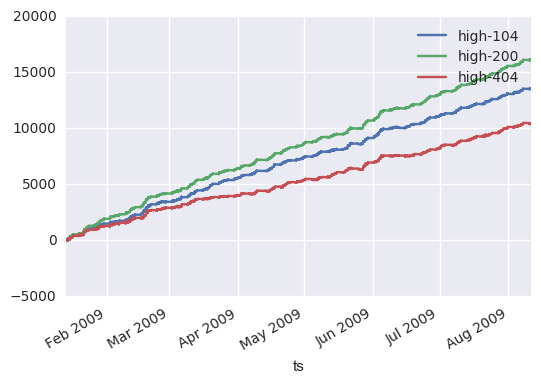

In [121]:
full_X['high-104'].head(100000).cumsum().plot(label='high-104')
full_X['high-200'].head(100000).cumsum().plot(label='high-200')
full_X['high-404'].head(100000).cumsum().plot(label='high-404')
plt.legend()

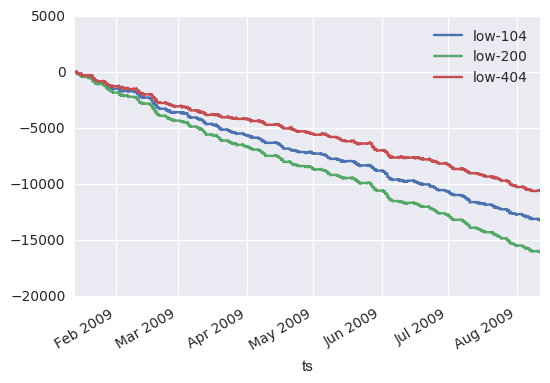

In [122]:
full_X['low-104'].head(100000).cumsum().plot(label='low-104')
full_X['low-200'].head(100000).cumsum().plot(label='low-200')
full_X['low-404'].head(100000).cumsum().plot(label='low-404')
plt.legend()

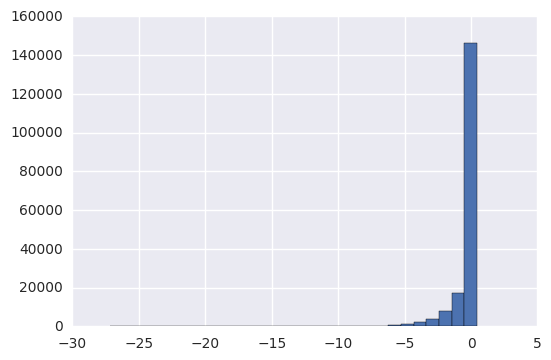

In [127]:
full_X['low-404'].hist(bins=30)

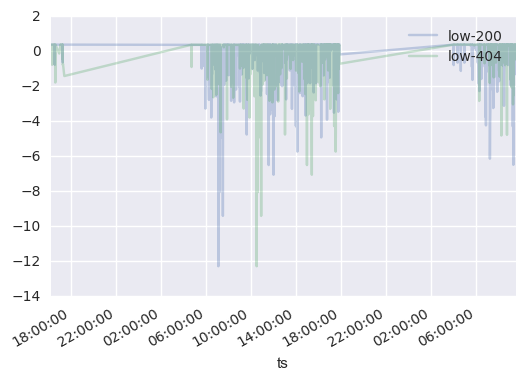

In [131]:
full_X['low-200'].head(1000).plot(label='low-200', alpha=0.3)
full_X['low-404'].head(1000).plot(label='low-404', alpha=0.3)
plt.legend()